In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plt_imshow(title,image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [9]:
image=cv2.imread("Images/nycu_logo.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray=cv2.bitwise_not(gray)

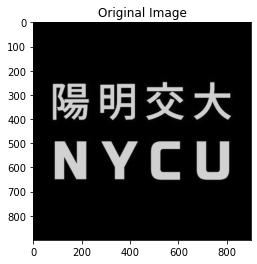

In [15]:
plt_imshow("Original Image",gray)

# Erotion

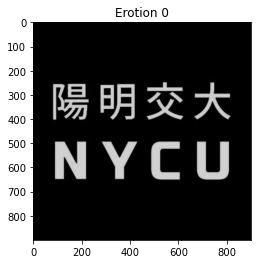

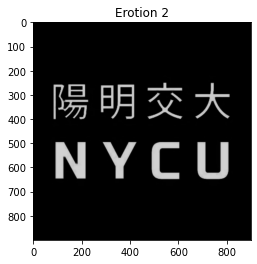

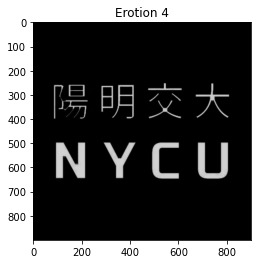

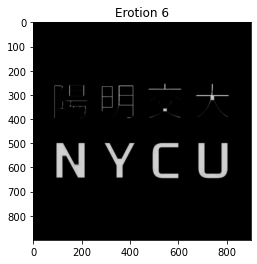

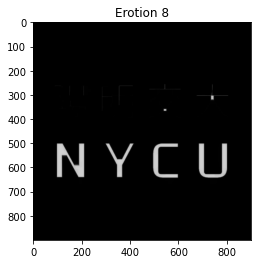

In [12]:
# Erotion
for a in range(0,10,2):
    erotion=cv2.erode(gray,None, iterations=a+1)
    plt_imshow("Erotion "+str(a),erotion )

# Dilation

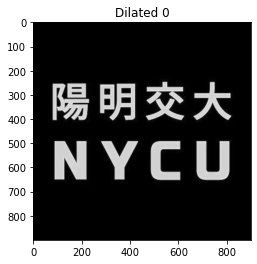

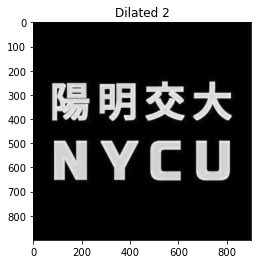

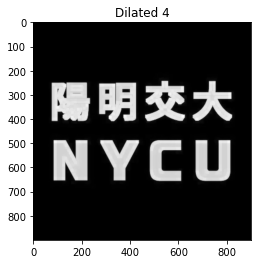

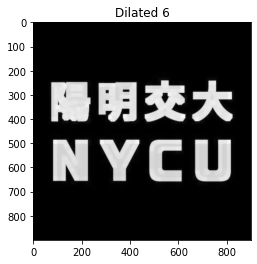

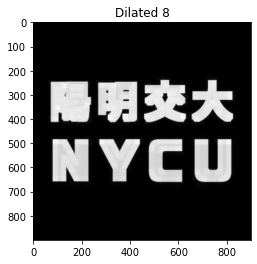

In [14]:
# Erotion
for a in range(0,10,2):
    dilated=cv2.dilate(gray,None, iterations=a+1)
    plt_imshow("Dilated "+str(a),dilated )

# Opening

Opening is erotion followed with dilation

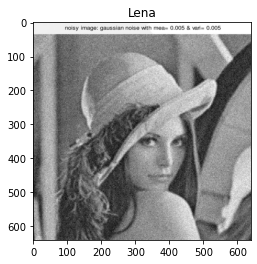

In [29]:
#Create kernel size first
image=cv2.imread("Images/lena_noisy.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt_imshow("Lena",gray)
kernelsizes=[(2,2),(5,5),(7,7),(9,9)]

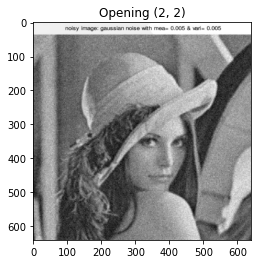

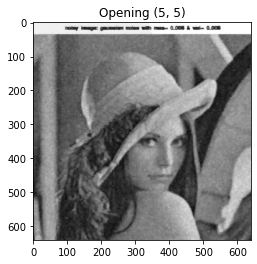

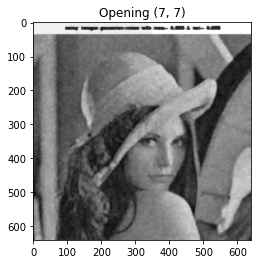

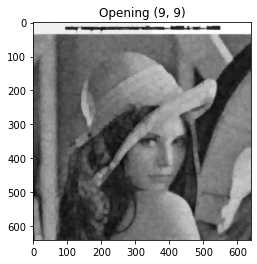

In [32]:
# We can gradually remove noise using opening
for kernelsize in kernelsizes:
    kernel=cv2.getStructuringElement(cv2.MORPH_RECT,kernelsize)
    opened=cv2.morphologyEx(gray,cv2.MORPH_OPEN,kernel)
    plt_imshow("Opening "+ str(kernelsize),opened)

# Closing

Closing is dilation followed by erotion

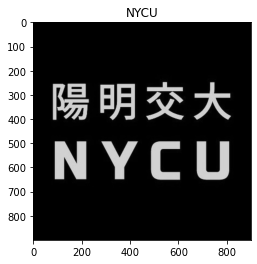

In [39]:
#Create kernel size first
image=cv2.imread("Images/nycu_logo.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray=cv2.bitwise_not(gray)
plt_imshow("NYCU",gray)
kernelsizes=[(5,5),(10,10),(15,15),(20,20)]

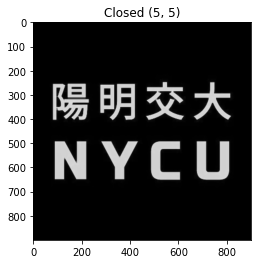

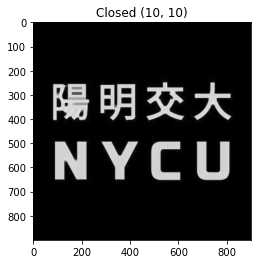

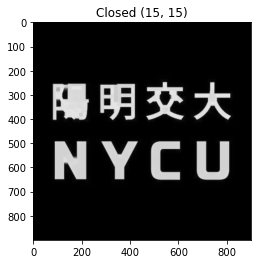

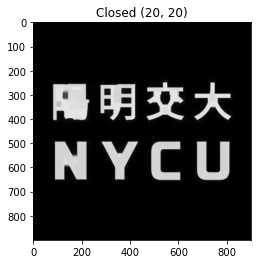

In [40]:
for kernelsize in kernelsizes:
    kernel=cv2.getStructuringElement(cv2.MORPH_RECT,kernelsize)
    closed=cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel)
    plt_imshow("Closed "+str(kernelsize),closed)

# Morphological Gradient

A morphological gradient is the difference between a dilation and erosio

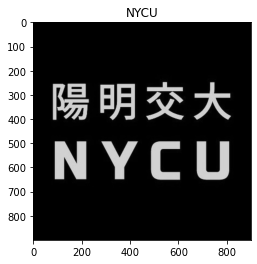

In [41]:
#Create kernel size first
image=cv2.imread("Images/nycu_logo.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray=cv2.bitwise_not(gray)
plt_imshow("NYCU",gray)
kernelsizes=[(5,5),(10,10),(15,15),(20,20)]

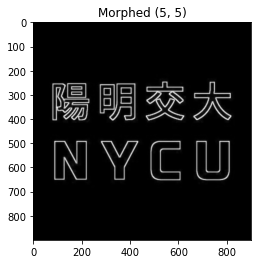

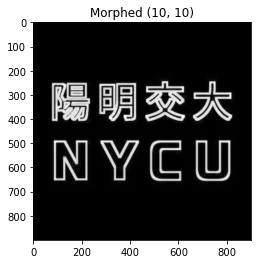

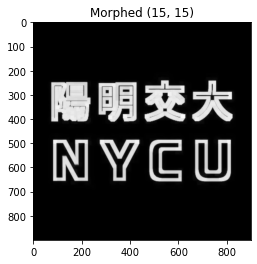

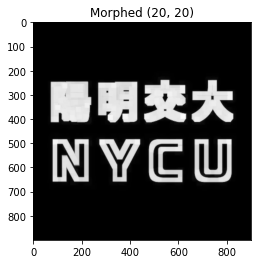

In [44]:
for kernelsize in kernelsizes:
    kernel=cv2.getStructuringElement(cv2.MORPH_RECT,kernelsize)
    morphed=cv2.morphologyEx(gray,cv2.MORPH_GRADIENT,kernel)
    plt_imshow("Morphed "+str(kernelsize),morphed)

# Black Hat

operation which enables us to find dark regions on a light

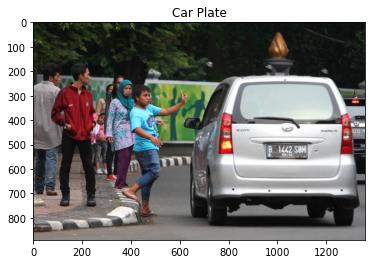

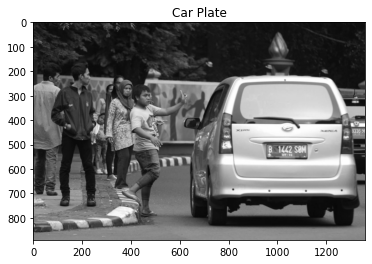

In [52]:
#Create kernel size first
image=cv2.imread("Images/car_plate.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# gray=cv2.bitwise_not(gray)
plt_imshow("Car Plate",image)
plt_imshow("Car Plate",gray)



In [68]:

# construct a rectangular kernel (13x5) and apply a blackhat
# operation which enables us to find dark regions on a light
# background
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT,(40,20))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)

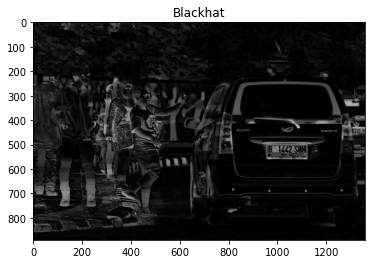

In [69]:
plt_imshow("Blackhat",blackhat)

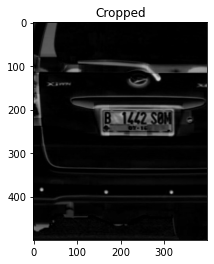

In [71]:
cropped=blackhat[300:800,800:1200]
plt_imshow("Cropped",cropped)

# White Hat

enable us to find light regions on a dark background

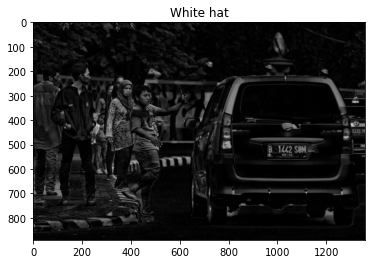

In [73]:
whiteHat=cv2.morphologyEx(gray,cv2.MORPH_TOPHAT,rectKernel)
plt_imshow("White hat",whiteHat) 

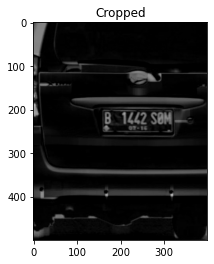

In [74]:
cropped_=whiteHat[300:800,800:1200]
plt_imshow("Cropped",cropped_)